# Peer-graded Assignment

Импорт необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

Выбираем распределение и генерируем из него выбрку объема 1000:

In [2]:
k=5
theta = 0.5
rv = sts.gamma(k, scale=theta)
sample = rv.rvs(1000)

Строим гистограмму выборки и теоретическую плотность распределения случайной величины:

Text(0,0.5,'$f(x)$')

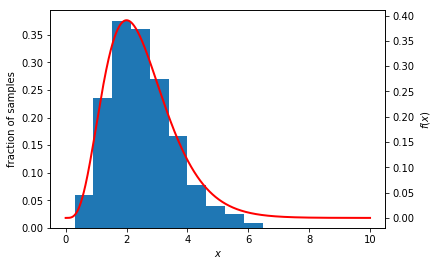

In [3]:
ax1 = plt.axes()
ax1.hist(sample, normed=True)
ax1.set_ylabel('fraction of samples')
ax1.set_xlabel('$x$')

ax2 = ax1.twinx()
x = np.linspace(0,10,1000)
pdf = rv.pdf(x)
ax2.plot(x, pdf, color='red', lw=2)
ax2.set_ylabel('$f(x)$')

Для 5ти значений объема генерируем выборки и строим гистораммы распределений их выборочных средних:

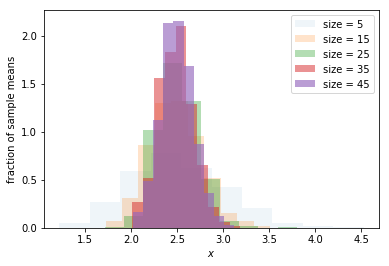

In [4]:
ax1 = plt.axes()
for n in range(5,55,10):
    means = []
    
    for j in range(1000):
        sample = rv.rvs(n)
        mean = np.sum(sample)/len(sample)
        means.append(mean)    
    ax1.hist(means, normed=True, alpha = n/70, label=f'size = {n}')
    ax1.set_ylabel('fraction of sample means')
    ax1.set_xlabel('$x$')    
    
plt.legend()

Среднее и дисперсия распределения, взятые из Википедии:

In [5]:
theory_mean = k*theta
theory_variance = k*theta**2
print(theory_mean,theory_variance)

2.5 1.25


Для каждой выборки считаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.
И рисуем поверх уже полученных гистограмм плотности соотвествующих нормальных распределений.

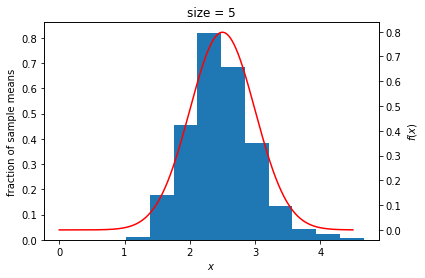

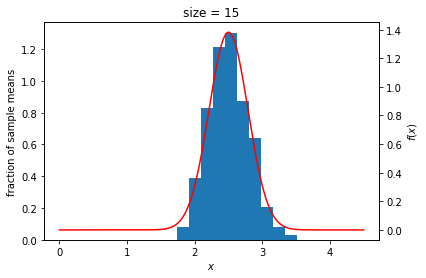

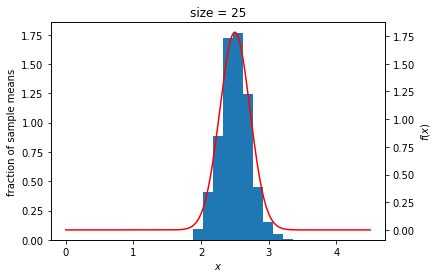

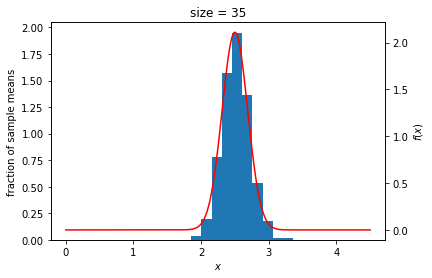

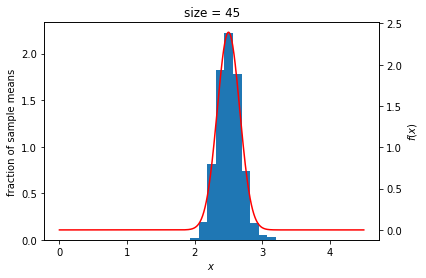

In [9]:
for n in range(5,55,10):
    fig = plt.figure()
    ax1 = plt.axes()
    ax2 = ax1.twinx()
    means = []
    for k in range(1000):
        sample = rv.rvs(n)
        mean = np.sum(sample)/len(sample)
        means.append(mean)
    ax1.set_title(f'size = {n}')
    ax1.hist(means, normed=True)
    ax1.set_ylabel('fraction of sample means')
    ax1.set_xlabel('$x$')
    
    norm_mean = theory_mean
    norm_variance = theory_variance/n
    norm_rv = sts.norm(loc=norm_mean, scale=sqrt(norm_variance))
    norm_rv.rvs(size=n)
    
    x = np.linspace(0,4.5,1000)
    pdf = norm_rv.pdf(x)
    ax2.plot(x, pdf, color='red')
    ax2.set_ylabel('$f(x)$')
    ax2.set_xlabel('$x$')
    
plt.legend()

Как мы видим, при увеличении n нормальное распределение параметрами, посчитанными на основе теоретических значений среднего и дисперсии, описывает распределение выборочных средних этой выборки все лучше и лучше. Даже несомотря на то, что изначально было взято скошенное распределение.
Точность аппроксимации распределения выборочных средних нормальным с ростом n увеличивается.
